# Ford GoBike System Data Analysis
## by Rebecca Acalami Appiok

## Introduction
>  This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. You can get more details about the system at https://www.lyft.com/bikes/bay-wheels/system-data.
Other current data could also be obtained from https://s3.amazonaws.com/baywheels-data/index.html

> Each trip is anonymized and includes:
1. Trip Duration (seconds)
2. Start Time and Date
3. End Time and Date
4. Start Station ID
5. Start Station Name
6. Start Station Latitude
7. Start Station Longitude
8. End Station ID
9. End Station Name
10. End Station Latitude
11. End Station Longitude
12. Bike ID
13. User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)




## Preliminary Wrangling



In [1]:
# import all packages and set plots to be embedded inline
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# loading data for the twitter archive 

url = 'https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv'

with open("fordgobike-tripdata.csv", mode='wb') as file:
    data = requests.get(url)
    file.write(data.content)
    
df_bike = pd.read_csv("fordgobike-tripdata.csv")

In [3]:
df_bike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
# looking at the over all summary of the data
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
# Check if there are any erroneous datatypes
df_bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
df_bike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df_bike.duplicated().sum()

0

In [8]:
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#####   Issues observed as assessing the data

1. Remove various insignificant features such as start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude
2. Assigning the correct data type for some columns 
3. Extracting the day, month and years of trips. 
4. Null values in columns member_birth_year and member_gender

In [9]:
# dropping the insignificant features 

df_bike.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

# testing the change
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


In [10]:
# Assigning the correct data type for some columns 

df_bike.start_time = pd.to_datetime(df_bike.start_time)
df_bike.end_time = pd.to_datetime(df_bike.end_time)
df_bike.start_station_id = df_bike.start_station_id.astype(str)
df_bike.end_station_id = df_bike.end_station_id.astype(str)
df_bike.bike_id = df_bike.bike_id.astype(str)
df_bike.user_type = df_bike.user_type.astype('category')


In [11]:
# testing the change

df_bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
end_station_id                     object
end_station_name                   object
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [12]:
# Extracting the day, month and years of trips. 

df_bike['trip_month'] = df_bike.start_time.dt.strftime('%b')
df_bike['trip_day'] = df_bike.start_time.dt.strftime('%a')
df_bike['trip_hour'] = df_bike.start_time.dt.strftime('%H')


In [13]:
# checking the months of the trips taken
df_bike.trip_month.unique()

array(['Feb'], dtype=object)

> this shows that the data of the trip taken is just for the month of February 

In [14]:
# testing the change

df_bike.dtypes,
df_bike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month,trip_day,trip_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,Feb,Thu,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,Feb,Thu,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,Feb,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,Feb,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,Feb,Thu,23


In [15]:
# dropping null values 
df_bike.dropna(inplace=True)

In [16]:
# testing change 
df_bike.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
trip_month                 0
trip_day                   0
trip_hour                  0
dtype: int64

In [17]:
df_bike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month,trip_day,trip_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,Feb,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,Feb,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,Feb,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,Feb,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,Feb,Thu,23


In [18]:
df_bike.to_csv('bike_master.csv')

### Observation 
> Data Strucrure : there are 1863721 records extending across 16 features. 

> Focus: 
  1. what is the average duration of trips?
  2. comparing the different groups  to the duration of trips. 
  

> Feature(s) of interest:  duration, month, day, hour and diffrent groups such as gender and user type.

## Univariate Exploration

> In this section, investigate distributions of individual variables. 

**Insight 1**: "What is the average duration of trips ?"

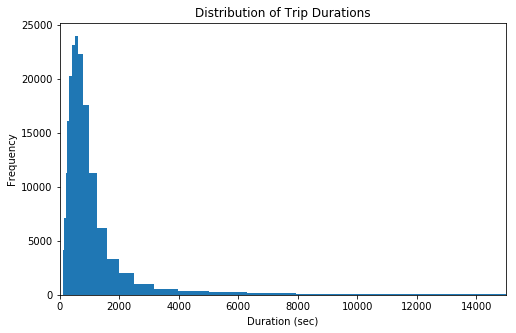

In [19]:
bins = 10 ** np.arange(2, 5.0 + 0.1, 0.1)

plt.figure(figsize=[8, 5])
plt.hist(data = df_bike, x = 'duration_sec', bins = bins)
plt.xlim(0,15000)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Frequency')
plt.show()

> The trip duration have large values which ranges from 60 to 85444 seconds. Trip duration in seconds would be changed to minutes and a logarithmic transformation would be applied for easy comprehension.

> The distribution of the frequency of trip is right-skewed, which normally means the mean is also to the right of the peak. It has an unimodal shape, with a peak at around 10 minutes. 

In [20]:
# Changing the trip durations from seconds to minutes 

df_bike['duration_mins'] = df_bike['duration_sec'] / 60
df_bike.drop('duration_sec' , axis = 1 , inplace = True)

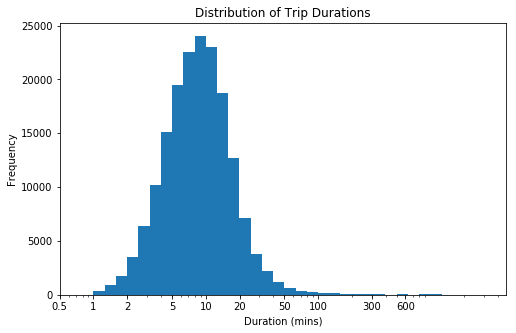

In [21]:
bins = 10 ** np.arange(0 , 3.5+0.1 , 0.1)
ticks = [0.5, 1, 2, 5, 10, 20, 50, 100, 300, 600]
labels = ['{}'.format(val) for val in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = df_bike, x = 'duration_mins', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (mins)')
plt.ylabel('Frequency')
plt.show()

> Now the distribution is much easy to interpret, most people take short trips which is usually between 5 to 20 minutes on an avegrage. 

**Insight 2**: "Number of trips in a day"

In [22]:
# creating functions to perform the repetitive task of value count and doing a count plot fot the individual variables.

def v_count(a):
    output = df_bike[a].value_counts()
    return output

def c_plot(a,b,c):
    output = sb.countplot(data=df_bike, x=a, color=sb.color_palette()[0]);
    plt.xlabel(b)
    plt.title(c);
    return output

In [23]:
# checking the count value for trips taken per a day

v_count('trip_day')

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: trip_day, dtype: int64

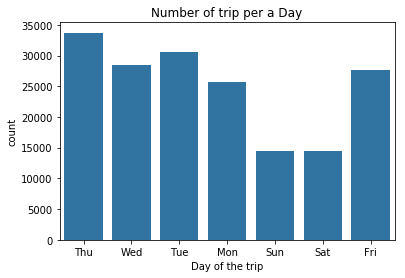

In [24]:
# ploting the count value for trips taken per a day

c_plot('trip_day','Day of the trip','Number of trip per a Day')

> The graph shows that lot of people do not take bike trips on the weekends because Saturday and Sunday has the least count. 

However, to make the report more presentable, the days of the week would be re-arranged properly. 

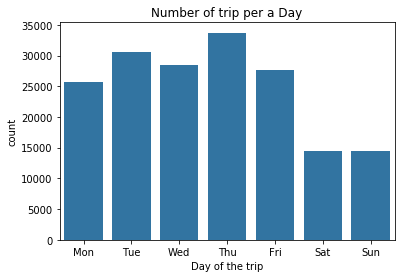

In [25]:
df_bike['trip_day'] = pd.Categorical(df_bike['trip_day'], categories=
    ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'],
    ordered=True)

c_plot('trip_day','Day of the trip','Number of trip per a Day')

Now, it is easier to differentiate between weekdays and the weekends, where you could see clearly that Saturady and Sunday has trip count. 

**Insight 3**: "Number of trips per hours of the day"

In [26]:
v_count('trip_hour')

17    20904
08    20227
18    16118
09    15204
16    13473
07    10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
06     3293
22     2793
23     1572
00      893
05      866
01      525
02      355
04      227
03      164
Name: trip_hour, dtype: int64

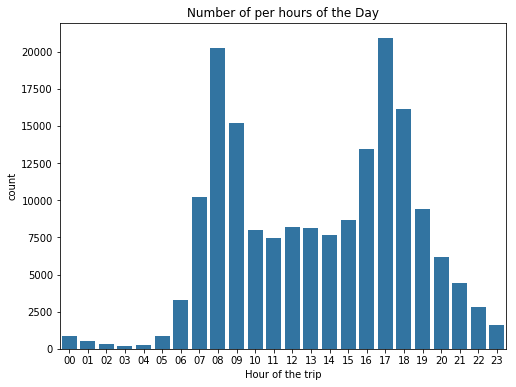

In [27]:
df_bike['trip_hour'] = pd.Categorical(df_bike['trip_hour'], categories=
    ['00', '01', '02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'],
    ordered=True)

plt.figure(figsize=[8, 6])
c_plot('trip_hour','Hour of the trip','Number of per hours of the Day')

Early morning from 07 to 09 and evening from 16 to 18 has the highest trip count showing that most people take their ride around those times. 

**Insight 4**: "Number of trips per user type Subscriber or Customer"

In [28]:
v_count('user_type')

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

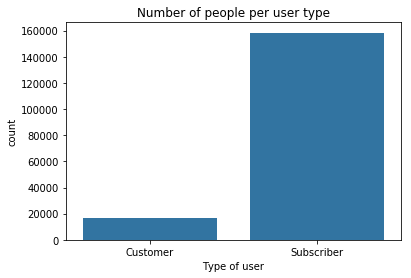

In [29]:

c_plot('user_type','Type of user','Number of people per user type')

You could see there is a clear difference between the number subcribers and the number customers. It looks like members - 'subcribers' mostly go ride than costomers who are just casual users

> To further get a clear picture of the difference I would do a pie chart visualization with percentage label

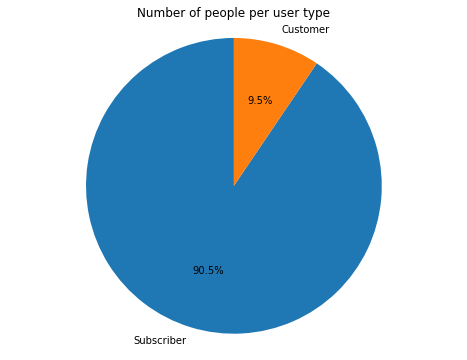

In [30]:
data = v_count('user_type')
label = ['Subscriber', 'Customer' ]

plt.figure(figsize=[8, 6])
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Number of people per user type')
plt.axis('equal')
plt.show()

Now we can clearly distingish between the number of people per user type. 

**Insight 4**: "Number of trips per gender"

In [31]:
v_count('member_gender')

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

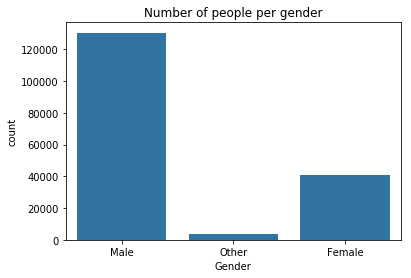

In [32]:
data = v_count('member_gender')
label = ['Male', 'Female', 'Other' ]

c_plot('member_gender','Gender','Number of people per gender')


More males then to go an a ride than females

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables.

 **Insight 1**: "Duration Against Days of the week"

In [33]:
df_bike.head(1)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month,trip_day,trip_hour,duration_mins
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,Feb,Thu,17,869.75


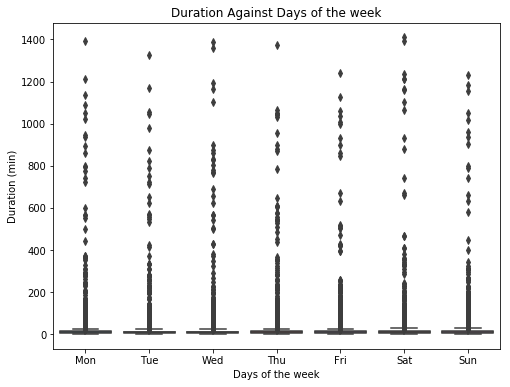

In [34]:
# plotting the relationship between days of the week and duration
plt.figure(figsize=[8, 6])

sb.boxplot(x="trip_day", y="duration_mins", data=df_bike)
plt.xlabel('Days of the week')
plt.ylabel('Duration (min)')
plt.title('Duration Against Days of the week');

There are some trips that long durations, and it is not making us see this distribution well, so we are going to cut down to trips below 60 mins

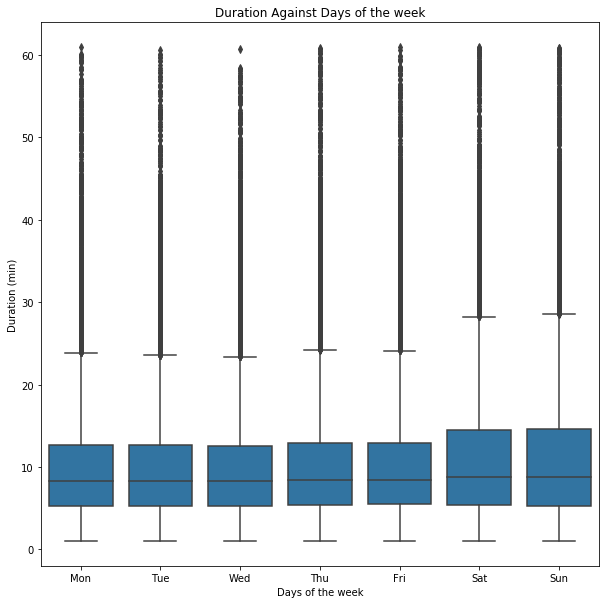

In [35]:
# querying for data with duration below 60 mins that is 1 hour

df_dur = df_bike.query("duration_mins < 61")

# plotting the relationship between days of the week and duration
plt.figure(figsize=[10, 10])

sb.boxplot(x="trip_day", y="duration_mins", color = sb.color_palette()[0], data=df_dur)
plt.xlabel('Days of the week')
plt.ylabel('Duration (min)')
plt.title('Duration Against Days of the week');

Now it could be said that weekend trips take a longer duration as compared to trips taken during the week

 **Insight 2**: "Duration Against Gender"

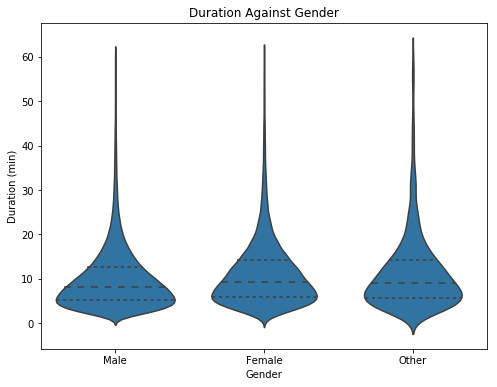

In [36]:
# plotting the relationship between gender and duration
# Still using the dataset with duration below 60 mins

plt.figure(figsize=[8, 6])
sb.violinplot( x='member_gender', y='duration_mins', color=sb.color_palette()[0], inner='quartile', data=df_dur)
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Duration Against Gender');

Although in previous section it was shown that there are more male users than the other gender groups, the trip duration does not seem to be affected by the user gender. The violin plots shows a median of around 10 mins for all 3 gender categories. 

 **Insight 3**: "Duration Against User Type"

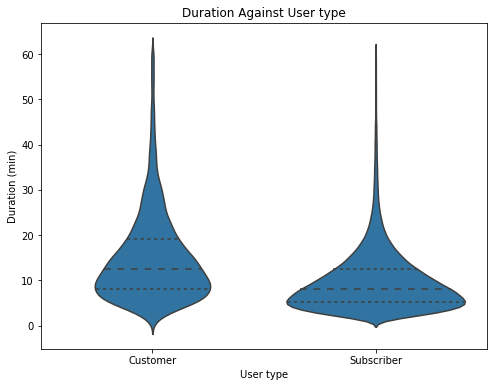

In [37]:
# plotting the relationship between gender and duration
# Still using the dataset with duration below 60 mins

plt.figure(figsize=[8, 6])
sb.violinplot( x='user_type', y='duration_mins', color=sb.color_palette()[0], inner='quartile', data=df_dur)
plt.xlabel('User type')
plt.ylabel('Duration (min)')
plt.title('Duration Against User type');

Based on the violin plots customer user type trips take a longer duration than subscriber user type

**Insight 4**: " User Type Against hour of trip and number of trips"

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(-2.575,0.5,'Number of Trips')

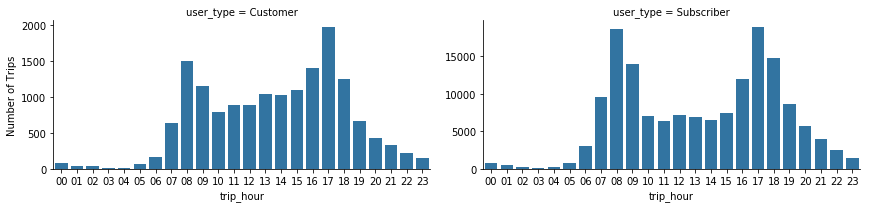

In [38]:

g = sb.FacetGrid(col='user_type', col_wrap = 2, aspect=2, sharey=False, data=df_dur)
g.map(sb.countplot, 'trip_hour')
g.axes[0].set_ylabel('Number of Trips')

The histogram show an obvious difference in the number of trips for both groups between the hours of 8 to 18, although they both are left skewed. 

**Insight 5**: " User Type Against Gender"

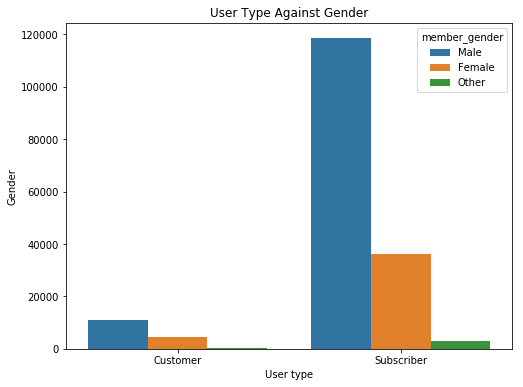

In [39]:
# plotting the count value of user type againt gender. 

plt.figure(figsize=[8, 6])
sb.countplot(data=df_dur, x='user_type', hue='member_gender')
plt.xlabel('User type')
plt.ylabel('Gender')
plt.title('User Type Against Gender');

As already shown above, there are more subscribers and males in the dataset

## Multivariate Exploration
> In this section, investigate relationships between three or more variables.


**Insight 1**: " Trip duartion across user type in different days of the week"

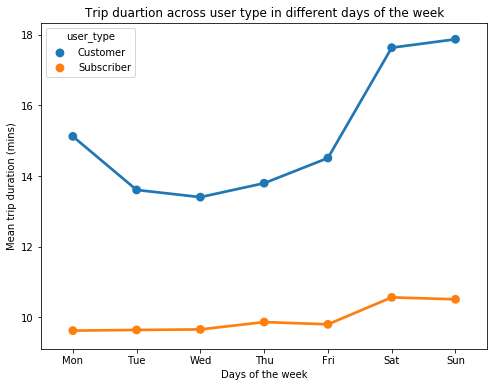

In [40]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(x = 'trip_day', y = 'duration_mins', hue = 'user_type', ci=None, data = df_dur)
plt.title('Trip duartion across user type in different days of the week')
plt.ylabel('Mean trip duration (mins)')
plt.xlabel('Days of the week')
plt.show();

As shown by the pointplot, customers take longer trips then subscribers, and their longest trips are mostly on the weekends.  

**Insight 2**: " Trip duartion across gender in different days of the week"

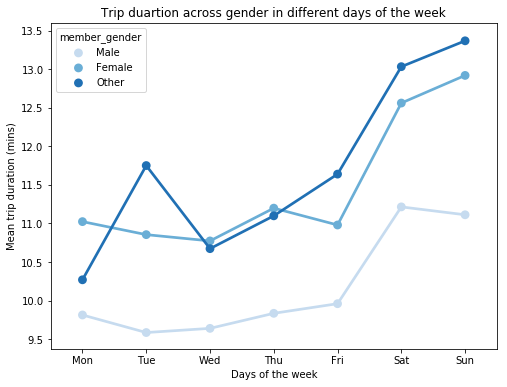

In [41]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_dur, x = 'trip_day', y = 'duration_mins', hue = 'member_gender', palette = 'Blues', ci=None)
plt.title('Trip duartion across gender in different days of the week')
plt.ylabel('Mean trip duration (mins)')
plt.xlabel('Days of the week')
plt.show();

The violin plots about gender and trip duration did not show that much of a different, the pointplot shows that the male gender group mostly take short trips than the female and others gender types.

**Insight 2**: " Trip duartion across user type in different hours of the day"

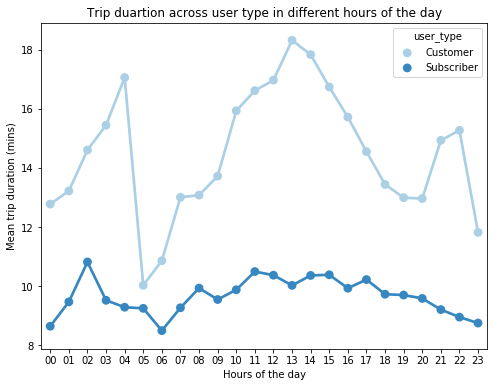

In [42]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_dur, x = 'trip_hour', y = 'duration_mins', hue = 'user_type', palette = 'Blues', ci=None)
plt.title('Trip duartion across user type in different hours of the day')
plt.ylabel('Mean trip duration (mins)')
plt.xlabel('Hours of the day')
plt.show();

Per the graph, most customers have a longer trip duration and mostly utilize the bike services during the day. 

## Conclusions
>Per the analysis that has been derived from this project

    Most people take short trips which is usually between 5 to 20 minutes on an avegrage.
    
    The least number of trip taken are usually weekends that is Saturday and Sunday.
    
    Early morning from 7 to 9 and evening from 16 to 18 has the highest trip count showing that most people take their ride       around those times.
    
    The Ford GoBike Service have more subscribers than customers, and among the people they server, majority are males, making like 70% of gender population and about 25% female and other gender groups.
    
    Although weekends have the least number of trips, that is when the longest trips are taken. Also. customers turn to take longer trips than subsrcibers. The male gender group mostly take short trips than the female and others gender types.
    
    
